# E-commerce Furniture Dataset 2024

# About Dataset
### Dataset Overview:
 This dataset comprises 2,000 entries scraped from AliExpress, detailing a variety of
 furniture products. It captures key sales metrics and product details, offering a
 snapshot of consumer purchasing patterns and market trends in the online furniture
 retail space.
### Data Science Applications:
 The dataset is ripe for exploratory data analysis, market trend analysis, and price
 optimization studies. It can also be used for predictive modeling to forecast sales,
 understand the impact of discounts on sales volume, and analyze the relationship
 between product features and their popularity

## Objective:
 The primary goal of this project is to predict the number of furniture items sold (sold) based on key product attributes. Using features like productTitle, originalPrice, price, and tagText, the project aims to uncover which factors most influence consumer purchasing behavior on online platforms such as AliExpress.

1. Data Collection

In [150]:
# Import Necessary libraries
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Warnings
import warnings
warnings.filterwarnings("ignore")




In [151]:
# Load the dataset
df = pd.read_csv(r"C:\DSAI study materials\Job Hunt\Unified Mentor Internship\E commerce Funiture project\ecommerce_furniture_dataset_2024.csv")

In [152]:
# view the first few rows of the dataset
df.head()

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping


In [153]:
tagText = df['tagText'].value_counts()
print(tagText)  

tagText
Free shipping           1880
+Shipping: $5.09           9
+Shipping: $239.64         2
+Shipping: $97.54          2
+Shipping: $64.56          2
                        ... 
+Shipping: $88.26          1
+Shipping: $170.31         1
+Shipping: $1,097.18       1
+Shipping: $106.13         1
+Shipping: $171.49         1
Name: count, Length: 100, dtype: int64


In [154]:
df.describe

<bound method NDFrame.describe of                                            productTitle originalPrice  \
0     Dresser For Bedroom With 9 Fabric Drawers Ward...           NaN   
1     Outdoor Conversation Set 4 Pieces Patio Furnit...           NaN   
2     Desser For Bedroom With 7 Fabric Drawers Organ...         $78.4   
3     Modern Accent Boucle Chair,Upholstered Tufted ...           NaN   
4     Small Unit Simple Computer Desk Household Wood...        $48.82   
...                                                 ...           ...   
1995  Modern TV Stand Entertainment Center with Two ...           NaN   
1996  Large Wardrobe Armoire Closet with 3 Doors, Fr...           NaN   
1997  Velvet Futon Sofa Bed, 73-inch Sleeper Couch w...           NaN   
1998  Furniture Acrylic Coffee Table Transparent Liv...           NaN   
1999  Bed Frane Bamboo and Metal Platform Bed Frame ...           NaN   

        price  sold        tagText  
0      $46.79   600  Free shipping  
1     $169.72  

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


2.Data Preprocessing

In [156]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 productTitle        0
originalPrice    1513
price               0
sold                0
tagText             3
dtype: int64


In [157]:
import numpy as np
import re

# Function to convert tagText to numeric shipping cost
def extract_shipping(val):
    if pd.isnull(val):
        return np.nan
    val = str(val).lower()
    if "free" in val:
        return 0.0
    match = re.search(r'([\d.,]+)', val)
    if match:
        return float(match.group(1).replace(',', ''))
    return np.nan

# Apply the function
df['shipping_cost'] = df['tagText'].apply(extract_shipping)

# Drop original tagText column if no longer needed
df.drop('tagText', axis=1, inplace=True)


In [158]:
df.head()
# show the values in the 'shipping_cost' column
print("Shipping cost values:\n", df['shipping_cost'].unique())

Shipping cost values:
 [   0.       nan   12.03   29.45   36.4    86.91  225.12    7.8    29.52
   38.07  104.89  239.64   41.19   18.44   80.21    5.09  110.64   64.01
  150.28  129.03   52.63   76.6   210.53   64.56  120.25    5.39    4.74
  258.18   72.79  168.91  109.18  106.13   94.92 1097.18  170.31   88.26
   23.49   30.44   14.97   75.99   14.91   18.81   69.95   21.07    2.91
  373.41   34.4  1115.86   86.33   74.22   21.65   63.08    5.86  112.1
  322.02    7.38   85.45   30.86  140.27   60.41  132.48   44.55  255.93
   72.12   66.53  142.23   23.29   28.9     8.86  744.64   21.62   12.82
 1323.31   85.58  350.41   55.98  141.75  397.72   84.44  106.05   97.54
  303.1   227.23  122.29   66.35   85.31   34.63    2.33  381.73  363.95
   60.62  230.37   13.95   54.16   67.69  134.27   92.22  151.69   41.93
   78.61  171.49]


In [159]:
# Fill missing originalPrice values with price values (assume no discount)
df['originalPrice'] = df['originalPrice'].fillna(df['price'])



# Fill missing shipping_cost values with 0 (assume free shipping)
df['shipping_cost'] = df['shipping_cost'].fillna(0.0)

# Final check
print(df.isnull().sum())
print(df.info()) # Check data types and non-null counts


productTitle     0
originalPrice    0
price            0
sold             0
shipping_cost    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   productTitle   2000 non-null   object 
 1   originalPrice  2000 non-null   object 
 2   price          2000 non-null   object 
 3   sold           2000 non-null   int64  
 4   shipping_cost  2000 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 78.3+ KB
None


3.Exploratory Data Analysis (EDA)

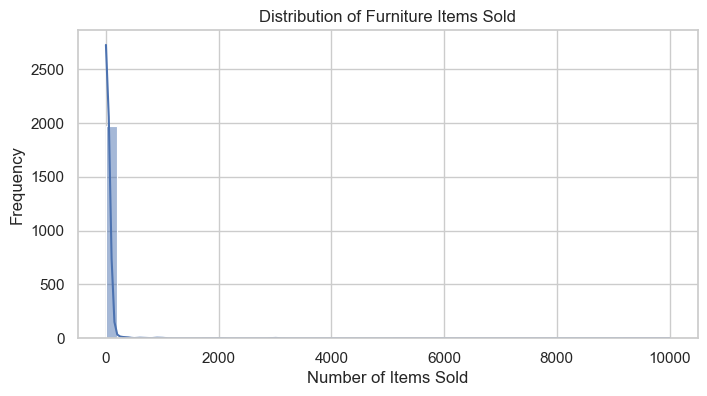

In [160]:
# Distribution of sold items
plt.figure(figsize=(8, 4))
sns.histplot(df['sold'], bins=50, kde=True)
plt.title('Distribution of Furniture Items Sold')
plt.xlabel('Number of Items Sold')
plt.ylabel('Frequency')
plt.show()


Insight:

The sales distribution is heavily skewed, with most furniture products selling in very low quantities, while a few items achieve exceptionally high sales (up to ~10,000 units). These best-selling products have a major impact on overall sales, suggesting that marketing and inventory strategies should prioritize these high-performing items while also finding ways to increase sales for the many low-volume products.

In [161]:
# Remove $ symbol and convert to float for price and originalPrice
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float) # Remove $ and convert to float
df['originalPrice'] = df['originalPrice'].replace('[\$,]', '', regex=True).astype(float) # Remove $ and convert to float

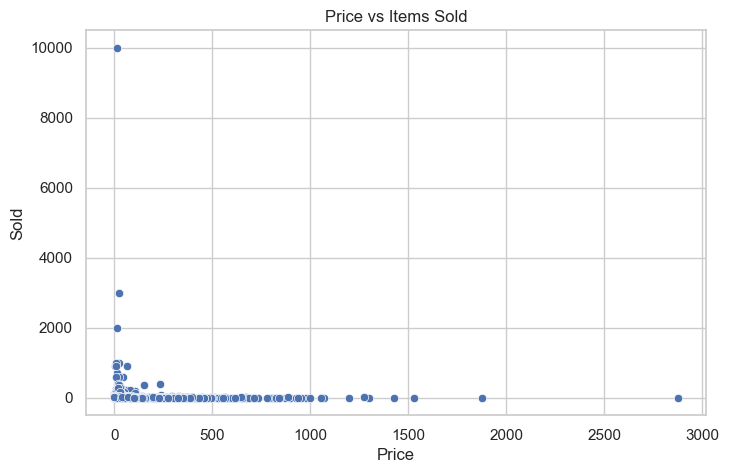

In [162]:
# Scatter plot of price vs items sold
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='price', y='sold')
plt.title('Price vs Items Sold')
plt.xlabel('Price')
plt.ylabel('Sold')
plt.show()


Insight:

Most products are priced below $500 and sell in relatively low quantities. A few low-priced items achieve exceptionally high sales, while higher-priced products generally have much lower sales volumes. This suggests that affordability plays a key role in driving demand.

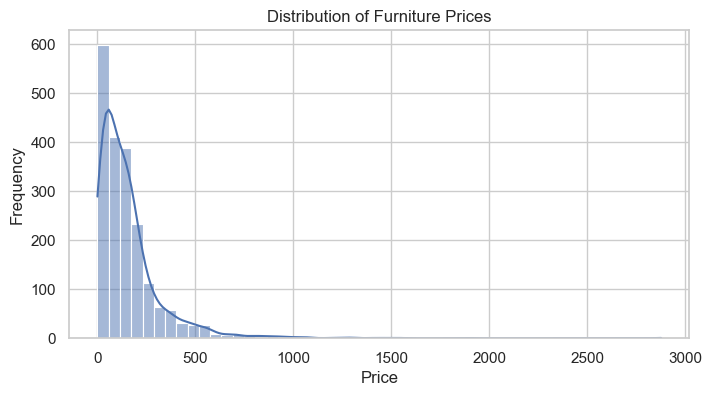

In [163]:
# Distribution of price 
plt.figure(figsize=(8, 4))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Furniture Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Insight:

Most furniture products are priced below $500, with a strong concentration between $50 and $200. A small number of premium products are priced above $1,000, creating a long tail in the distribution. This suggests the store primarily targets the budget to mid-range market, with a few high-end offerings.

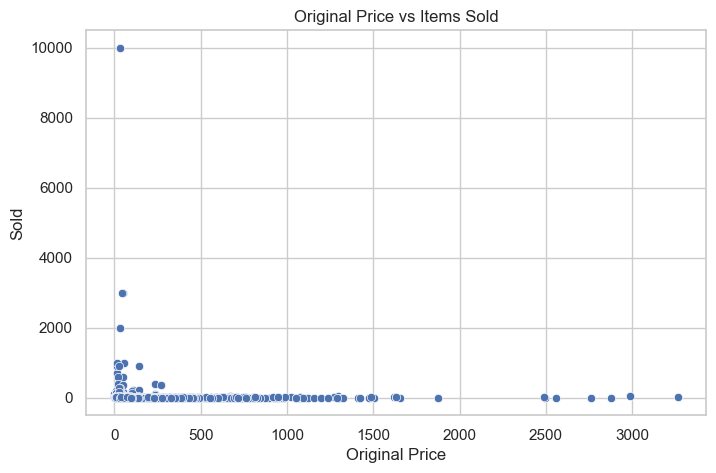

In [164]:
# Scatter plot of original price vs items sold
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='originalPrice', y='sold')
plt.title('Original Price vs Items Sold')
plt.xlabel('Original Price')
plt.ylabel('Sold')
plt.show()


Insight:

Most products have an original price below $500 and sell in relatively low quantities. A few low-priced items achieve exceptionally high sales, while high-priced products (above $1,000) generally have very limited sales. This indicates that lower pricing is strongly associated with higher demand in this product category.

In [165]:
df.head()  

,productTitle,originalPrice,price,sold,shipping_cost
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,46.79,46.79,600,0.0
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,169.72,169.72,0,0.0
2,Desser For Bedroom With 7 Fabric Drawers Organ...,78.40,39.46,7,0.0
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",111.99,111.99,0,0.0
4,Small Unit Simple Computer Desk Household Wood...,48.82,21.37,1,0.0


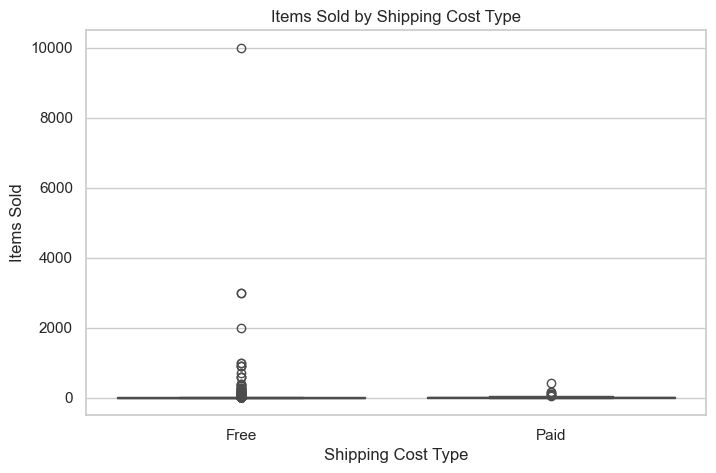

In [166]:
# Box plot of items sold by shipping cost
df['shipping_cost_category'] = df['shipping_cost'].apply(
    lambda x: 'Free' if x == 0 else 'Paid'
)

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='shipping_cost_category', y='sold')
plt.title('Items Sold by Shipping Cost Type')
plt.xlabel('Shipping Cost Type')
plt.ylabel('Items Sold')
plt.show()


Products with free shipping tend to sell in much higher volumes than those with paid shipping, with several extreme high-selling cases. Paid shipping items generally have lower and more consistent sales. This suggests that offering free shipping could significantly boost sales volume.

<Figure size 1000x800 with 0 Axes>

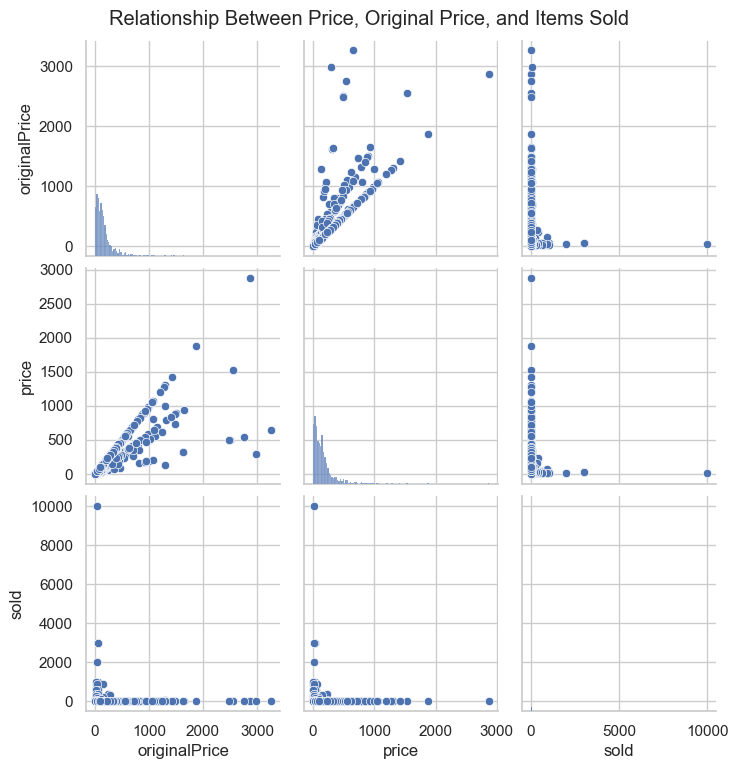

In [167]:
# Pairplot of originalPrice, price, and sold
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
sns.pairplot(df, vars=['originalPrice', 'price', 'sold'], kind='scatter')
plt.suptitle('Relationship Between Price, Original Price, and Items Sold', y=1.02)
plt.show()

Strong price–original price correlation → Discounts are generally proportional to the original price.

Sales concentrated at low prices → Most high-selling products are in the lower price range.

Few extreme outliers → A handful of products have very high sales or prices, which could skew averages.

Sparse mid–high price sales → Mid to high price range items have low or no sales activity.

4.Feature Engineering

In [168]:
# Feature Engineering - Handling Product Titles with TF-IDF Vectorization

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# 1. Initialize TF-IDF Vectorizer (using top 100 words, excluding stopwords)
tfidf = TfidfVectorizer(max_features=100, stop_words='english')

# 2. Fit and transform the 'productTitle' column
title_tfidf = tfidf.fit_transform(df['productTitle'])

# 3. Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(title_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# 4. Reset index before merging to avoid alignment issues
df = df.reset_index(drop=True)
tfidf_df = tfidf_df.reset_index(drop=True)

# 5. Concatenate TF-IDF features to the main DataFrame
df = pd.concat([df, tfidf_df], axis=1)

# 6. Optionally drop the original 'productTitle' column (now encoded)
df.drop('productTitle', axis=1, inplace=True)


In [169]:
df.head()

,originalPrice,price,sold,shipping_cost,shipping_cost_category,adjustable,bed,bedroom,bedside,bench,...,tables,tv,upholstered,vanity,velvet,wardrobe,white,wicker,wood,wooden
0,46.79,46.79,600,0.0,Free,0.0,0.0,0.209944,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.332654,0.0,0.000000,0.0,0.000000
1,169.72,169.72,0,0.0,Free,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.300086,0.0,0.000000
2,78.40,39.46,7,0.0,Free,0.0,0.0,0.224799,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
3,111.99,111.99,0,0.0,Free,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.344964,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
4,48.82,21.37,1,0.0,Free,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.551425


In [170]:


# Create a new feature: discount percentage
df['discountPercent'] = ((df['originalPrice'] - df['price']) / df['originalPrice']) * 100

# Optional: round to 2 decimal places
df['discountPercent'] = df['discountPercent'].round(2)


In [171]:
import numpy as np
df['sold_log'] = np.log1p(df['sold'])  # This becomes the new target


5.Model Selection and Training

In [172]:
# Feature Scaling - Standardizing Numerical Features
from sklearn.preprocessing import StandardScaler

features = df.drop(['sold', 'sold_log', 'shipping_cost_category'], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [173]:
# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, df['sold_log'], test_size=0.2, random_state=42)


In [174]:
# Train a Linear Regression model
from sklearn.linear_model import LinearRegression
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)


LinearRegression()

In [175]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
# Random Forest doesn't need scaled features
features_rf = df.drop(['sold', 'sold_log', 'shipping_cost_category'], axis=1)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    features_rf, df['sold_log'], test_size=0.2, random_state=42)

model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train_rf, y_train_rf)


RandomForestRegressor(random_state=42)

6.Evaluation

In [176]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression
pred_lr = model_lr.predict(X_test)
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, pred_lr))
print("R²:", r2_score(y_test, pred_lr))

# Random Forest
pred_rf = model_rf.predict(X_test_rf)
print("Random Forest:")
print("MSE:", mean_squared_error(y_test_rf, pred_rf))
print("R²:", r2_score(y_test_rf, pred_rf))


Linear Regression:
MSE: 1.3464974662604963
R²: 0.2728182203953141
Random Forest:
MSE: 1.2250372830746923
R²: 0.33841331758139137


In [177]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np

# Define the hyperparameter space
param_dist = {
    'n_estimators': randint(100, 300),            # Number of trees
    'max_depth': [None, 10, 20, 30, 50],          # Depth of each tree
    'min_samples_split': [2, 5, 10],              # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],                # Minimum samples at a leaf
    'max_features': ['sqrt', 'log2', None]        # Number of features to consider
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Setup Randomized Search
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=30,                # Number of combinations to try
    cv=5,                     # 5-fold cross-validation
    scoring='r2',             # Use R² score to evaluate
    verbose=2,
    random_state=42,
    n_jobs=-1                 # Use all CPU cores
)

# Fit to training data
random_search.fit(X_train, y_train)

# Get best model
best_rf = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 121}


In [178]:
from sklearn.metrics import mean_squared_error, r2_score

pred_rf_tuned = best_rf.predict(X_test)
mse = mean_squared_error(y_test, pred_rf_tuned)
r2 = r2_score(y_test, pred_rf_tuned)

print("Tuned Random Forest:")
print("MSE:", mse)
print("R²:", r2)


Tuned Random Forest:
MSE: 1.1691187952086777
R²: 0.3686123387738641


In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = best_rf.feature_importances_

# Create a DataFrame
feature_importance_df = pd.DataFrame({
    'feature': X_train_rf.columns,
    'importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)


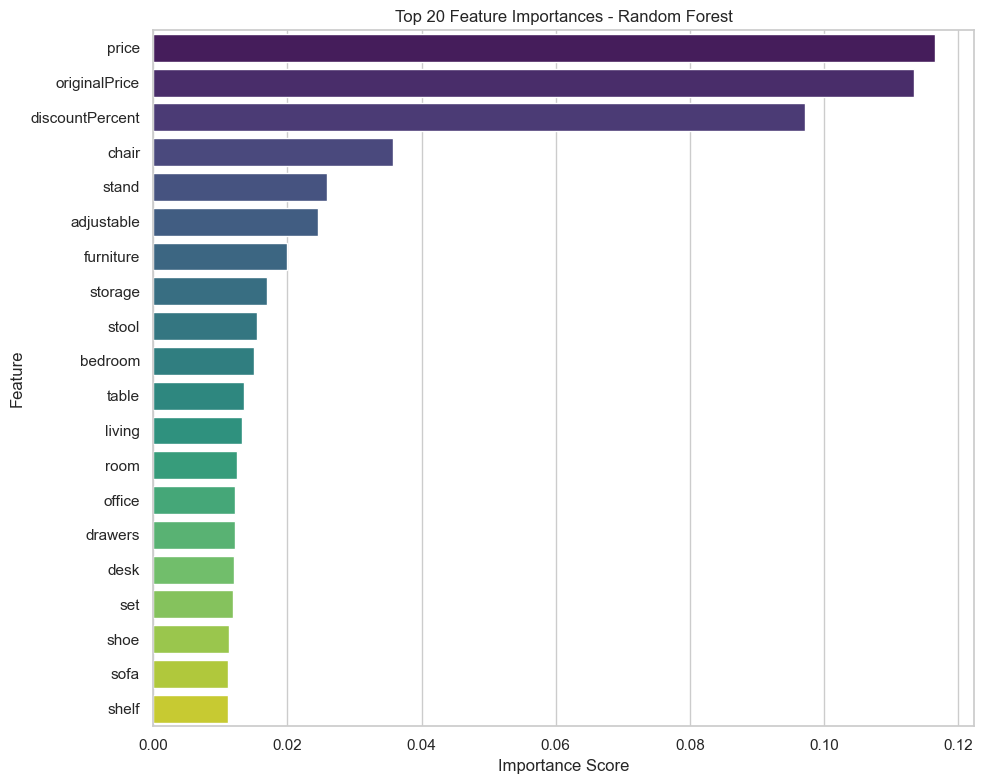

In [180]:
# Plot top 20 features
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(20), palette='viridis')
plt.title('Top 20 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


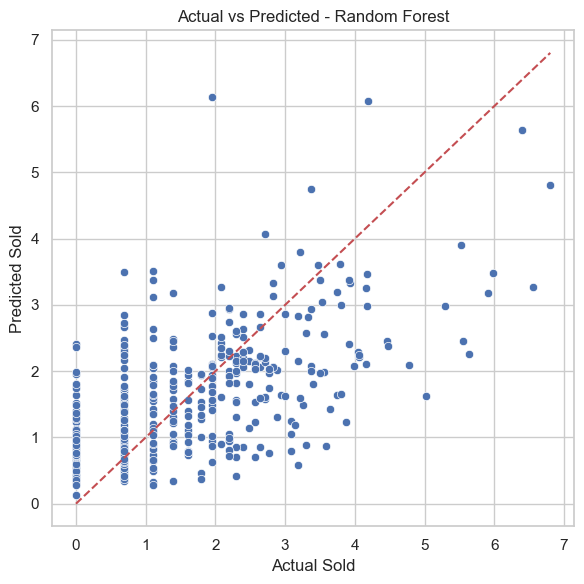

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=pred_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Sold')
plt.ylabel('Predicted Sold')
plt.title('Actual vs Predicted - Random Forest')
plt.tight_layout()
plt.show()
